In [1]:
import tensorflow as tf
# from tensorboard.plugins.hparams import api as hp
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
ratings = pd.read_pickle("tiny_selection_longform.pkl")

In [4]:
user_enc = LabelEncoder()
ratings['user'] = user_enc.fit_transform(ratings['user_id'].values)
n_users = ratings['user'].nunique()
n_users

2390

In [5]:
item_enc = LabelEncoder()
ratings['movie'] = item_enc.fit_transform(ratings['movie_id'].values)
n_movies = ratings['movie'].nunique()
n_movies

1648

In [6]:
nmovie_id = ratings.movie_id.nunique()
nuser_id = ratings.user_id.nunique()

In [7]:
X_train, X_test = train_test_split(ratings[['movie', 'user', 'rating_score']], test_size=0.2, random_state=42)

In [8]:
len(X_train)

2000

In [21]:
l2_1 = keras.regularizers.l2(.1)
l2_01 = 'l2'
l2_001 = keras.regularizers.l2(.001)

In [22]:
HP_NUM_UNITS = [64]
HP_DROPOUT = [.3, .4, .5]
HP_LEARNING_RATE = [.01]
HP_REGULARIZER = [l2_1, l2_01, l2_001]

In [23]:
def train_test_model(hparams):
    
    input_movies = keras.layers.Input(shape=[1])
    embed_movies = keras.layers.Embedding(nmovie_id+1, 15)(input_movies)
    movies_out = keras.layers.Flatten()(embed_movies)

    input_users = keras.layers.Input(shape=[1])
    embed_users = keras.layers.Embedding(nuser_id+1, 15)(input_users)
    users_out = keras.layers.Flatten()(embed_users)

    conc_layer = keras.layers.Concatenate()([movies_out, users_out])
    x = keras.layers.Dense(hparams['HP_NUM_UNITS'], 
                           activation='relu', 
                           kernel_regularizer=hparams['HP_REGULARIZER'])(conc_layer)
    dropout = x = keras.layers.Dropout(rate=hparams['HP_DROPOUT'], seed=42)(x)
    x_out = x = keras.layers.Dense(1, 
                                   activation='relu',
                                  kernel_regularizer=hparams['HP_REGULARIZER'])(x)

    model = keras.Model([input_movies, input_users], x_out)
    
    opt = tf.optimizers.Adam(learning_rate=hparams['HP_LEARNING_RATE'])
    model.compile(optimizer=opt, loss='mean_squared_error', metrics = keras.metrics.RootMeanSquaredError())
    
    hist = model.fit([X_train.movie, X_train.user], 
                 X_train.rating_score,  
                 batch_size=10000, epochs=20, validation_split=.2)

#     print(hist.history['val_mean_squared_error'])
    return hist

In [24]:
run_history = {}

session_num = 0

for num_units in HP_NUM_UNITS:
    for dropout_rate in HP_DROPOUT:
        for learning_rate in HP_LEARNING_RATE:
            for regularization in HP_REGULARIZER:
                hparams = {
                'HP_NUM_UNITS': num_units,
                'HP_DROPOUT': dropout_rate,
                'HP_LEARNING_RATE': learning_rate,
                'HP_REGULARIZER': regularization,
                }
                
                run_name = "run-{}".format(session_num)
                print("----Starting trial: {}".format(run_name))
                print(hparams)
                
                output = train_test_model(hparams,)
                run_history[run_name] = {
                    'params': hparams,
                    'output': output,
                }
                session_num += 1

----Starting trial: run-0
{'HP_NUM_UNITS': 64, 'HP_DROPOUT': 0.3, 'HP_LEARNING_RATE': 0.01, 'HP_REGULARIZER': <tensorflow.python.keras.regularizers.L2 object at 0x7fddd07383a0>}
Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 14.9762 - root_mean_squared_error: 3.2856 - val_loss: 14.0214 - val_root_mean_squared_error: 3.2109
Epoch 2/20
1/1 [==============================] - 0s 284ms/step - loss: 14.0935 - root_mean_squared_error: 3.2221 - val_loss: 13.2120 - val_root_mean_squared_error: 3.1498
Epoch 3/20
1/1 [==============================] - 0s 273ms/step - loss: 13.2025 - root_mean_squared_error: 3.1483 - val_loss: 12.4148 - val_root_mean_squared_error: 3.0825
Epoch 4/20
1/1 [==============================] - 0s 265ms/step - loss: 12.3047 - root_mean_squared_error: 3.0646 - val_loss: 11.6169 - val_root_mean_squared_error: 3.0062
Epoch 5/20
1/1 [==============================] - 0s 229ms/step - loss: 11.4109 - root_mean_squared_error: 2.9718 - val_loss: 10.8207 - v

1/1 [==============================] - 0s 145ms/step - loss: 2.2590 - root_mean_squared_error: 1.4114 - val_loss: 4.5257 - val_root_mean_squared_error: 2.0613
Epoch 13/20
1/1 [==============================] - 0s 177ms/step - loss: 1.7807 - root_mean_squared_error: 1.2264 - val_loss: 4.0613 - val_root_mean_squared_error: 1.9427
Epoch 14/20
1/1 [==============================] - 0s 247ms/step - loss: 1.6849 - root_mean_squared_error: 1.1822 - val_loss: 3.7366 - val_root_mean_squared_error: 1.8552
Epoch 15/20
1/1 [==============================] - 0s 257ms/step - loss: 1.8347 - root_mean_squared_error: 1.2408 - val_loss: 3.5438 - val_root_mean_squared_error: 1.8019
Epoch 16/20
1/1 [==============================] - 0s 289ms/step - loss: 1.9622 - root_mean_squared_error: 1.2904 - val_loss: 3.4520 - val_root_mean_squared_error: 1.7775
Epoch 17/20
1/1 [==============================] - 0s 253ms/step - loss: 1.9112 - root_mean_squared_error: 1.2723 - val_loss: 3.4309 - val_root_mean_squared_

Epoch 18/20
1/1 [==============================] - 0s 221ms/step - loss: 2.9151 - root_mean_squared_error: 1.2577 - val_loss: 3.8804 - val_root_mean_squared_error: 1.6156
Epoch 19/20
1/1 [==============================] - 0s 243ms/step - loss: 2.8243 - root_mean_squared_error: 1.2466 - val_loss: 3.7399 - val_root_mean_squared_error: 1.5988
Epoch 20/20
1/1 [==============================] - 0s 265ms/step - loss: 2.5710 - root_mean_squared_error: 1.1778 - val_loss: 3.6305 - val_root_mean_squared_error: 1.5957
----Starting trial: run-7
{'HP_NUM_UNITS': 64, 'HP_DROPOUT': 0.5, 'HP_LEARNING_RATE': 0.01, 'HP_REGULARIZER': 'l2'}
Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 11.2754 - root_mean_squared_error: 3.2917 - val_loss: 10.7746 - val_root_mean_squared_error: 3.2215
Epoch 2/20
1/1 [==============================] - 0s 113ms/step - loss: 10.8810 - root_mean_squared_error: 3.2380 - val_loss: 10.3495 - val_root_mean_squared_error: 3.1602
Epoch 3/20
1/1 [==============

In [12]:
import matplotlib.pyplot as plt

In [25]:
len(run_history.keys())

9

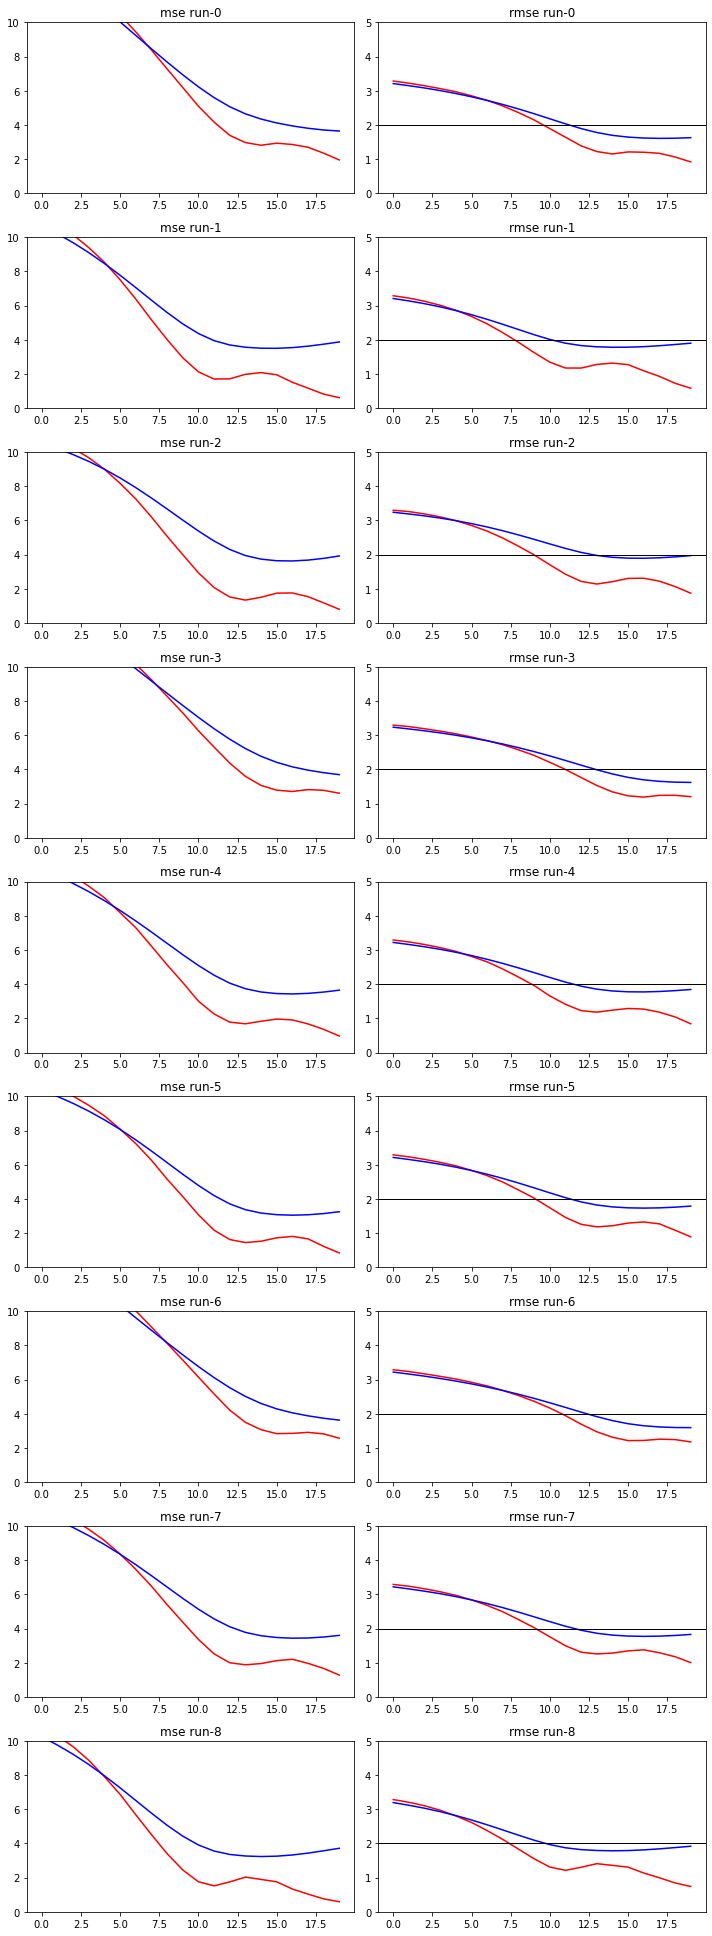

In [27]:
fig, axs = plt.subplots(ncols=2, nrows=len(run_history.keys()), figsize=(10, len(run_history.keys())*3))

for n, key in enumerate(run_history.keys()):
    axs[n,0].plot(run_history[key]['output'].history['loss'], color='r')
    axs[n,0].plot(run_history[key]['output'].history['val_loss'], color='b')
    
    axs[n,1].plot(run_history[key]['output'].history['root_mean_squared_error'], color='r')
    axs[n,1].plot(run_history[key]['output'].history['val_root_mean_squared_error'], color='b')
    
    title_str = '-'.join(str(run_history[key]['params'][param]) for param in run_history[key]['params'].keys())
    
    axs[n,0].set_title("mse {}".format(key))
    axs[n,1].set_title("rmse {}".format(key))
    
    axs[n,0].set_ylim(0,10)
    axs[n,1].set_ylim(0,5)
    
    axs[n, 1].axhline(2, color='k', lw=1)
    
plt.tight_layout()   
plt.show()

In [28]:
run_history['run-3']

{'params': {'HP_NUM_UNITS': 64,
  'HP_DROPOUT': 0.4,
  'HP_LEARNING_RATE': 0.01,
  'HP_REGULARIZER': <tensorflow.python.keras.regularizers.L2 at 0x7fddd07383a0>},
 'output': <tensorflow.python.keras.callbacks.History at 0x7fde38733ac0>}

In [34]:
run_history['run-3']['params']['HP_REGULARIZER'].l2

array(0.1, dtype=float32)

In [29]:
run_history['run-6']

{'params': {'HP_NUM_UNITS': 64,
  'HP_DROPOUT': 0.5,
  'HP_LEARNING_RATE': 0.01,
  'HP_REGULARIZER': <tensorflow.python.keras.regularizers.L2 at 0x7fddd07383a0>},
 'output': <tensorflow.python.keras.callbacks.History at 0x7fddd039f3d0>}

In [33]:
run_history['run-6']['params']['HP_REGULARIZER'].l2

array(0.1, dtype=float32)

In [35]:
run_history['run-6']['output'].history

{'loss': [15.126957893371582,
  14.302515029907227,
  13.442108154296875,
  12.591041564941406,
  11.7659330368042,
  10.896003723144531,
  10.020912170410156,
  9.07721996307373,
  8.117756843566895,
  7.141837120056152,
  6.1467413902282715,
  5.159980297088623,
  4.215908527374268,
  3.5021610260009766,
  3.0690560340881348,
  2.8396730422973633,
  2.855475664138794,
  2.9151430130004883,
  2.8243234157562256,
  2.571030616760254],
 'root_mean_squared_error': [3.287964344024658,
  3.235121488571167,
  3.1680960655212402,
  3.094359874725342,
  3.0162410736083984,
  2.9212758541107178,
  2.8147876262664795,
  2.683695077896118,
  2.5347533226013184,
  2.364759922027588,
  2.168527126312256,
  1.9457024335861206,
  1.6966429948806763,
  1.4740407466888428,
  1.314143180847168,
  1.2158786058425903,
  1.2210086584091187,
  1.2576971054077148,
  1.2466260194778442,
  1.1777936220169067],
 'val_loss': [14.20332145690918,
  13.404439926147461,
  12.630151748657227,
  11.865474700927734,
 

In [37]:
for key in run_history.keys():
    print(key, run_history[key]['params']['HP_REGULARIZER'])

run-0 <tensorflow.python.keras.regularizers.L2 object at 0x7fddd07383a0>
run-1 l2
run-2 <tensorflow.python.keras.regularizers.L2 object at 0x7fddd07387f0>
run-3 <tensorflow.python.keras.regularizers.L2 object at 0x7fddd07383a0>
run-4 l2
run-5 <tensorflow.python.keras.regularizers.L2 object at 0x7fddd07387f0>
run-6 <tensorflow.python.keras.regularizers.L2 object at 0x7fddd07383a0>
run-7 l2
run-8 <tensorflow.python.keras.regularizers.L2 object at 0x7fddd07387f0>


In [46]:
type(run_history['run-6']['params']['HP_REGULARIZER'])

tensorflow.python.keras.regularizers.L2

In [60]:
run_history.keys()

dict_keys(['run-0', 'run-1', 'run-2', 'run-3', 'run-4', 'run-5', 'run-6', 'run-7', 'run-8', 'batch_size', 'n_epochs'])

In [36]:
import json

In [114]:
def export_history(run_history, batch_size, n_epochs, save_path):
    history_dict = run_history.copy()
    for key in history_dict:
        if history_dict[key]['params']['HP_REGULARIZER']=='l2':
            
            history_dict[key]['params']['HP_REGULARIZER'] = list(.01)
        else:
            try:
                history_dict[key]['params']['HP_REGULARIZER'] = history_dict[key]['params']['HP_REGULARIZER'].l2.tolist()
            except:
                pass   
        if type(history_dict[key]['params']['HP_REGULARIZER']) == np.ndarray:
            history_dict[key]['params']['HP_REGULARIZER'] = history_dict[key]['params']['HP_REGULARIZER'].tolist()
        history_dict[key]['params']['batch_size'] = batch_size
        history_dict[key]['params']['n_epochs'] = n_epochs
        
        try:
            history_dict[key]['output'] = history_dict[key]['output'].history
        except:
            history_dict[key]['output'] = history_dict[key]['output']
      
    with open(save_path, 'w') as f:
        json.dump(history_dict, f)
    
    return history_dict

new_dict = export_history(run_history, 10000, 20, "./run_history/model3.json")

In [65]:
run_history.keys()

dict_keys(['run-0', 'run-1', 'run-2', 'run-3', 'run-4', 'run-5', 'run-6', 'run-7', 'run-8'])

In [81]:
run_history['run-8']['output']

{'loss': [10.810523986816406,
  10.294780731201172,
  9.652180671691895,
  8.857110023498535,
  7.897888660430908,
  6.865461826324463,
  5.67415714263916,
  4.514880180358887,
  3.4009149074554443,
  2.447021961212158,
  1.7566146850585938,
  1.5183496475219727,
  1.7468785047531128,
  2.0295066833496094,
  1.8936409950256348,
  1.752683401107788,
  1.331841230392456,
  1.0341793298721313,
  0.7563908100128174,
  0.5898122191429138],
 'root_mean_squared_error': [3.2814857959747314,
  3.201984405517578,
  3.1000566482543945,
  2.9691050052642822,
  2.802945613861084,
  2.612276315689087,
  2.373255729675293,
  2.114821195602417,
  1.8323849439620972,
  1.55003023147583,
  1.3079673051834106,
  1.212824821472168,
  1.3030996322631836,
  1.407117486000061,
  1.3580347299575806,
  1.3054113388061523,
  1.133354902267456,
  0.9941335916519165,
  0.8438369035720825,
  0.739603579044342],
 'val_loss': [10.240217208862305,
  9.748448371887207,
  9.210306167602539,
  8.612605094909668,
  7.955

In [99]:
# del run_history['batch_size']
# del run_history['n_epochs']
del new_dict

NameError: name 'new_dict' is not defined

In [115]:
new_dict = export_history(run_history, 10000, 20, "./run_history/model3.json")

In [116]:
new_dict.keys()

dict_keys(['run-0', 'run-1', 'run-2', 'run-3', 'run-4', 'run-5', 'run-6', 'run-7', 'run-8'])

In [117]:
new_dict['run-0']

{'params': {'HP_NUM_UNITS': 64,
  'HP_DROPOUT': 0.3,
  'HP_LEARNING_RATE': 0.01,
  'HP_REGULARIZER': 0.10000000149011612,
  'batch_size': 10000,
  'n_epochs': 20},
 'output': {'loss': [14.976187705993652,
   14.093539237976074,
   13.202536582946777,
   12.304670333862305,
   11.410916328430176,
   10.428725242614746,
   9.444127082824707,
   8.385875701904297,
   7.280162334442139,
   6.192324638366699,
   5.0996856689453125,
   4.169384002685547,
   3.395491600036621,
   2.97196888923645,
   2.8164844512939453,
   2.9375085830688477,
   2.8595614433288574,
   2.6980714797973633,
   2.350900411605835,
   1.953698754310608],
  'root_mean_squared_error': [3.2856204509735107,
   3.222083568572998,
   3.1482722759246826,
   3.0645558834075928,
   2.9717767238616943,
   2.852684736251831,
   2.719496965408325,
   2.5563395023345947,
   2.362865686416626,
   2.14660906791687,
   1.8944929838180542,
   1.6422537565231323,
   1.3896390199661255,
   1.2231523990631104,
   1.1540451049804688,
 

In [86]:
for key in new_dict.keys():
    if 'run' in key:
        print(key, new_dict[key]['params']['HP_REGULARIZER'])

run-0 0.1
run-1 0.01
run-2 0.001
run-3 0.1
run-4 0.01
run-5 0.001
run-6 0.1
run-7 0.01
run-8 0.001


In [42]:
new_dict['run-1']['params']['HP_REGULARIZER']

'l2'

In [87]:
new_dict['run-1']['params']

{'HP_NUM_UNITS': 64,
 'HP_DROPOUT': 0.3,
 'HP_LEARNING_RATE': 0.01,
 'HP_REGULARIZER': array(0.01, dtype=float32),
 'batch_size': 10000,
 'n_epochs': 20}

In [113]:
type(run_history['run-1']['params']['HP_REGULARIZER'])

numpy.ndarray

In [107]:
new_dict['run-1']['output']

NameError: name 'new_dict' is not defined